In [2]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [3]:
df = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Cases/Cases/Sonar/Sonar.csv")
df.head(5)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
le = LabelEncoder()
df['Class'] = le.fit_transform( df['Class'] )
le.classes_

array(['M', 'R'], dtype=object)

In [5]:
X, y = df.drop('Class', axis=1), df['Class']

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                  stratify=y)

In [7]:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

In [8]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.746031746031746
0.8306288032454361


In [9]:
#  Iris Dataset

In [10]:
iris = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Datasets/Datasets/iris.csv")
iris.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X, y = iris.drop('Species', axis=1), iris['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=25, stratify=y)

In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [14]:
# Unsupervised Learning use of Linear Discriminant

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
lda.fit(X, y)
components = lda.transform(X)

In [17]:
components.head(3)

,lineardiscriminantanalysis0,lineardiscriminantanalysis1
0,8.061800,-0.300421
1,7.128688,0.786660
2,7.489828,0.265384


In [18]:
components['Species'] = iris['Species']
components.head(3)

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,-0.300421,setosa
1,7.128688,0.786660,setosa
2,7.489828,0.265384,setosa


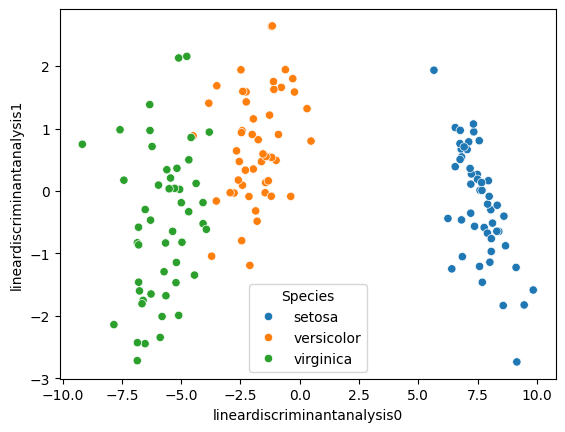

In [19]:
sns.scatterplot(data=components, x= 'lineardiscriminantanalysis0', y = 'lineardiscriminantanalysis1', hue = 'Species')
plt.show()

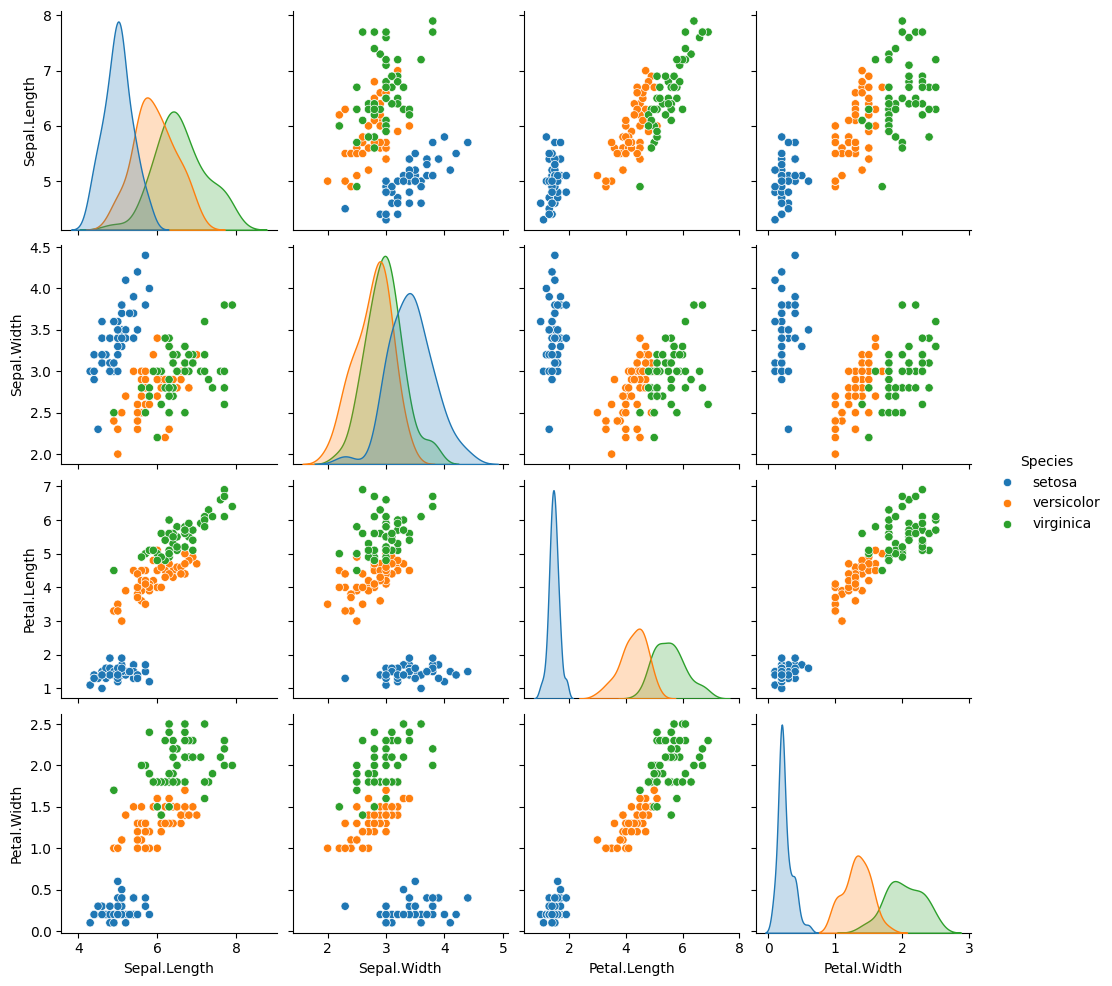

In [20]:
sns.pairplot(iris, hue='Species')
plt.show()